In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
#warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# Defining Strategy
## Day Trader Strategy (9-13 minute crossover)
## Swing Trader Strategy (20-100 day crossover)
## Long-term Trader Strategy (50 or 100-200 day crossover)

In [7]:
def day_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="1d", interval="5m")
    
    # Calculate moving averages
    ema9 = stock_data['Close'].ewm(span=9).mean()
    ema13 = stock_data['Close'].ewm(span=13).mean()

    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema9
    signals['long_ema'] = ema13
    signals.loc[9:, 'position'] = np.where(signals['short_ema'][9:] > signals['long_ema'][9:], 1, 0)
    signals.loc[13:, 'position'] = np.where(signals['short_ema'][13:] < signals['long_ema'][13:], -1, signals['position'][13:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
   # ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
   # ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema9.index, ema9, label='9 EMA')
    ax.plot(ema13.index, ema13, label='13 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()

    return signals

In [8]:
def swing_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="1y", interval="1d")
    
    # Calculate moving averages
    ema20 = stock_data['Close'].ewm(span=20).mean()
    ema100 = stock_data['Close'].ewm(span=100).mean()
    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema20
    signals['long_ema'] = ema100
    signals['position'][20:] = np.where(signals['short_ema'][20:] > signals['long_ema'][20:], 1, 0)
    signals['position'][100:] = np.where(signals['short_ema'][100:] < signals['long_ema'][100:], -1, signals['position'][100:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
   # ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
   # ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema20.index, ema20, label='20 EMA')
    ax.plot(ema100.index, ema100, label='100 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()
    
    return signals


In [9]:
def long_term_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="5y", interval="1d")
    
    # Calculate moving averages
    ema50 = stock_data['Close'].ewm(span=50).mean()
    ema100 = stock_data['Close'].ewm(span=100).mean()
    ema200 = stock_data['Close'].ewm(span=200).mean()
    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema50
    signals['medium_ema'] = ema100
    signals['long_ema'] = ema200
    signals.loc[50:, 'position'] = np.where(signals['short_ema'][50:] > signals['long_ema'][50:], 1, 0)
    signals.loc[50:, 'position'] = np.where(signals['short_ema'][50:] < signals['medium_ema'][50:], -1, signals['position'][50:])
    signals['position'][200:] = np.where(signals['short_ema'][200:] < signals['long_ema'][200:], -1, signals['position'][200:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
    #ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
    #ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema50.index, ema50, label='50 EMA')
    ax.plot(ema100.index, ema100, label='100 EMA')
    ax.plot(ema200.index, ema200, label='200 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()
    
    return signals

# Command Line Interface
## 1. Choose Strategy (Day Trader, Swing Trader, Long-term Trader)
## 2. Choose Ticker
## 3. To-do: Choose dates 

Enter the ticker symbol of the stock:  AAPL
Choose a strategy (1 = day trader, 2 = swing trader, 3 = long-term trader):  1


[*********************100%***********************]  1 of 1 completed


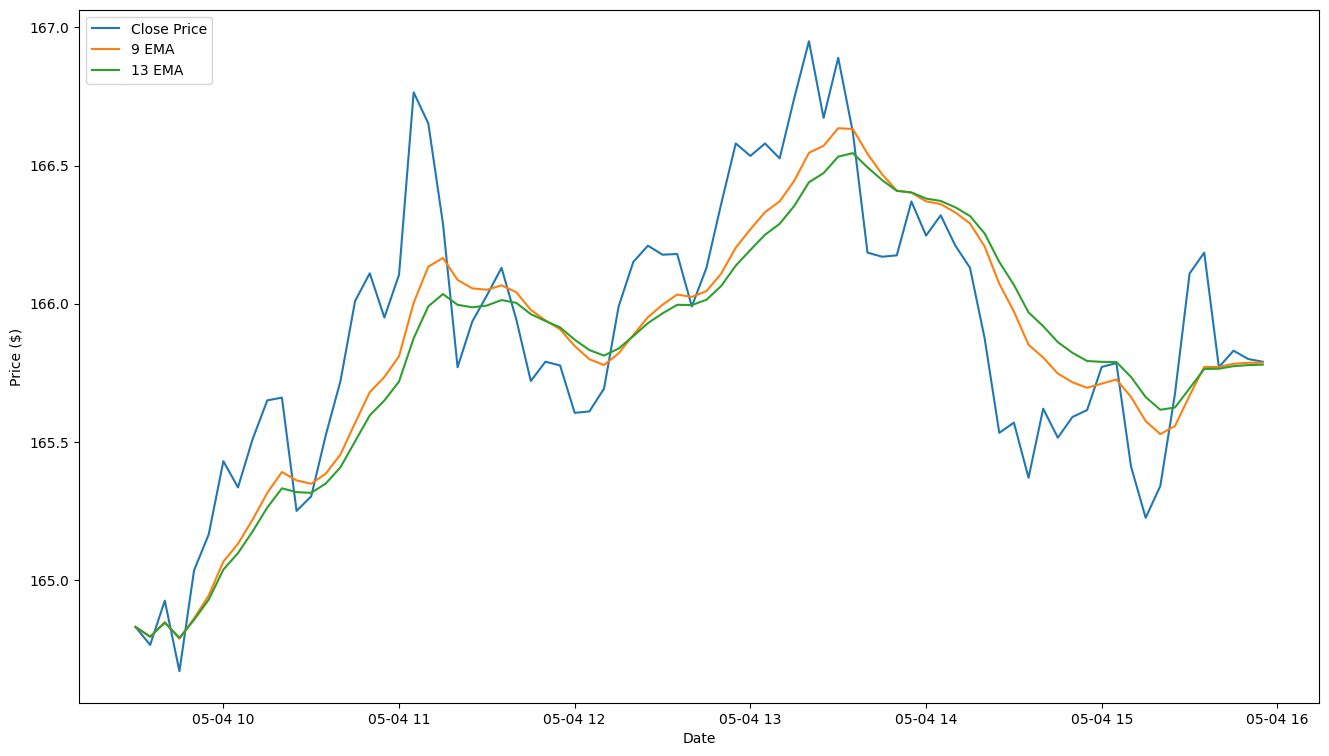

[*********************100%***********************]  1 of 1 completed
                           position   short_ema    long_ema
Datetime                                                   
2023-05-04 09:30:00-04:00         0  164.830002  164.830002
2023-05-04 09:35:00-04:00         0  164.793889  164.795001
2023-05-04 09:40:00-04:00         0  164.847624  164.845159
2023-05-04 09:45:00-04:00         0  164.787350  164.790693
2023-05-04 09:50:00-04:00         0  164.861021  164.855646
...                             ...         ...         ...
2023-05-04 15:35:00-04:00         1  165.771056  165.763747
2023-05-04 15:40:00-04:00         1  165.770864  165.764654
2023-05-04 15:45:00-04:00         1  165.782691  165.773989
2023-05-04 15:50:00-04:00         1  165.786132  165.777690
2023-05-04 15:55:00-04:00         1  165.786904  165.779448

[78 rows x 3 columns]

Backtesting Results:
                                  stock      holdings          cash  \
Datetime                           

In [10]:
# Ask user for input
ticker = input("Enter the ticker symbol of the stock: ")
strategy_choice = input("Choose a strategy (1 = day trader, 2 = swing trader, 3 = long-term trader): ")

# Backtesting function
def backtest(signals, stock_data, initial_capital=10000):
    positions = pd.DataFrame(index=signals.index).fillna(0)
    positions['stock'] = signals['position'] * stock_data['Close']
    portfolio = positions.multiply(stock_data['Close'], axis=0)
    pos_diff = positions.diff()
    portfolio['holdings'] = (positions.multiply(stock_data['Close'], axis=0)).sum(axis=1)
    portfolio['cash'] = initial_capital - (pos_diff.multiply(stock_data['Close'], axis=0)).sum(axis=1).cumsum()
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    portfolio['returns'] = portfolio['total'].pct_change()
    return portfolio

# Execute the chosen EMA crossover strategy and plot the results
if strategy_choice == "1":
    signals = day_trader_strategy(ticker)
    stock_data = yf.download(ticker, period="1d", interval="5m")
elif strategy_choice == "2":
    signals = swing_trader_strategy(ticker)
    stock_data = yf.download(ticker, period="1y", interval="1d")
elif strategy_choice == "3":
    signals = long_term_trader_strategy(ticker)
    stock_data = yf.download(ticker, period="5y", interval="1d")
else:
    print("Invalid strategy choice.")
    stock_data = None
    
# Perform backtesting and print the results
if stock_data is not None:
    print(signals)
    portfolio = backtest(signals, stock_data)
    print("\nBacktesting Results:")
    print(portfolio)
    
# Re-enable SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'


# II. EXECUTING STRATEGY
## Identify when the long-term and short-term moving averages cross and define as a buy or sell opportunity

Inputs: Moving average dataframe
Outputs: Prices at crossovers and identifying buy versus sell, plot of buy/sell signals


# III. CALCULATING PROFITABILITY
## Calculating the profitability of the strategy within the given time frame
Thoughts: price comparisons begin on date of first trigger


Inputs: Moving average dataframe
Outputs: Prices at crossovers and identifying buy versus sell, plot of buy/sell signals